In [2]:
import pandas as pd
import numpy as np 

In [55]:
from google.colab import files
uploaded = files.upload()

Saving ad_clicks.csv to ad_clicks (1).csv


In [56]:
import io
df = pd.read_csv(io.BytesIO(uploaded["ad_clicks.csv"]),  encoding='ISO-8859-1')

In [57]:
df

,user_id,utm_source,day,ad_click_timestamp,experimental_group
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B
...,...,...,...,...,...
1649,fe8b5236-78f6-4192-9da6-a76bba67cfe6,twitter,7 - Sunday,NaN,A
1650,fed3db6d-8c92-40e3-a4fb-1fb9d7337eb1,facebook,5 - Friday,NaN,B
1651,ff3a22ff-521c-478c-87ca-7dc7b8f34372,twitter,3 - Wednesday,NaN,B
1652,ff3af0d6-b092-4c4d-9f2e-2bdd8f7c0732,google,1 - Monday,22:57,A


In [59]:
# Your manager wants to know which ad platform is getting you the most views

df.groupby("utm_source").user_id.count()

utm_source
email       255
facebook    504
google      680
twitter     215
Name: user_id, dtype: int64

In [62]:
~df.ad_click_timestamp.isnull()

0        True
1       False
2       False
3       False
4       False
        ...  
1649    False
1650    False
1651    False
1652     True
1653    False
Name: ad_click_timestamp, Length: 1654, dtype: bool

In [63]:
df.ad_click_timestamp.isnull()

0       False
1        True
2        True
3        True
4        True
        ...  
1649     True
1650     True
1651     True
1652    False
1653     True
Name: ad_click_timestamp, Length: 1654, dtype: bool

In [61]:
# If the column ad_click_timestamp is not null, then someone actually clicked on the ad that was displayed

df["is_click"] = ~df.ad_click_timestamp.isnull()
df

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A,True
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B,False
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A,False
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B,False
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B,False
...,...,...,...,...,...,...
1649,fe8b5236-78f6-4192-9da6-a76bba67cfe6,twitter,7 - Sunday,NaN,A,False
1650,fed3db6d-8c92-40e3-a4fb-1fb9d7337eb1,facebook,5 - Friday,NaN,B,False
1651,ff3a22ff-521c-478c-87ca-7dc7b8f34372,twitter,3 - Wednesday,NaN,B,False
1652,ff3af0d6-b092-4c4d-9f2e-2bdd8f7c0732,google,1 - Monday,22:57,A,True


In [66]:
# We want to know the percent of people who clicked on ads from each utm_source

df_source = df.groupby(["utm_source", "is_click"]).user_id.count().reset_index()
df_source

,utm_source,is_click,user_id
0,email,False,175
1,email,True,80
2,facebook,False,324
3,facebook,True,180
4,google,False,441
5,google,True,239
6,twitter,False,149
7,twitter,True,66


In [73]:
# pivot table 

df_clicks = df_source.pivot(
  columns="is_click",
  index="utm_source",
  values="user_id"
).reset_index()
df_clicks

is_click,utm_source,False,True
0,email,175,80
1,facebook,324,180
2,google,441,239
3,twitter,149,66


In [74]:
df_clicks["percent_clicked"] = round(df_clicks[True] / (df_clicks[True] + df_clicks[False]) * 100, 2)
df_clicks

is_click,utm_source,False,True,percent_clicked
0,email,175,80,31.37
1,facebook,324,180,35.71
2,google,441,239,35.15
3,twitter,149,66,30.70


In [ ]:
# Facebook perfomed better 

In [76]:
df.groupby("experimental_group").user_id.count()

experimental_group
A    827
B    827
Name: user_id, dtype: int64

In [95]:
df_ab = df.groupby(["experimental_group", "is_click"]).user_id.count().reset_index().pivot(index="experimental_group", columns="is_click", values="user_id").reset_index()
df_ab

is_click,experimental_group,False,True
0,A,517,310
1,B,572,255


In [96]:
df_ab["percentage_clicks"] = round(df_ab[True] / (df_ab[True] + df_ab[False]) * 100, 2)
df_ab

is_click,experimental_group,False,True,percentage_clicks
0,A,517,310,37.48
1,B,572,255,30.83


In [81]:
a_clicks = df.loc[df["experimental_group"] == "A"]
a_clicks

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A,True
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A,False
5,013b0072-7b72-40e7-b698-98b4d0c9967f,facebook,1 - Monday,NaN,A,False
6,0153d85b-7660-4c39-92eb-1e1acd023280,google,4 - Thursday,NaN,A,False
7,01555297-d6e6-49ae-aeba-1b196fdbb09f,google,3 - Wednesday,NaN,A,False
...,...,...,...,...,...,...
1643,fceb13ea-fd8c-446a-a61f-f977d404330a,twitter,6 - Saturday,NaN,A,False
1646,fd7d06ea-38b5-4ed9-acc9-777047db8c56,google,4 - Thursday,NaN,A,False
1647,fe570a20-448f-40ed-930b-8482b8a7c231,facebook,1 - Monday,20:7,A,True
1649,fe8b5236-78f6-4192-9da6-a76bba67cfe6,twitter,7 - Sunday,NaN,A,False


In [88]:
df_a = a_clicks.groupby(["is_click", "day"]).user_id.count().reset_index().pivot(index="day", columns="is_click", values="user_id").reset_index()
df_a

is_click,day,False,True
0,1 - Monday,70,43
1,2 - Tuesday,76,43
2,3 - Wednesday,86,38
3,4 - Thursday,69,47
4,5 - Friday,77,51
5,6 - Saturday,73,45
6,7 - Sunday,66,43


In [82]:
b_clicks = df.loc[df["experimental_group"] == "B"]
b_clicks

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B,False
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B,False
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B,False
9,01a210c3-fde0-4e6f-8efd-4f0e38730ae6,email,2 - Tuesday,15:21,B,True
10,01adb2e7-f711-4ae4-a7c6-29f48457eea1,google,3 - Wednesday,NaN,B,False
...,...,...,...,...,...,...
1645,fd2a5852-f0ef-4162-84a6-107a42dc46b5,twitter,3 - Wednesday,NaN,B,False
1648,fe6cfa5a-cc63-4770-8d56-c13ac8cf5bef,google,3 - Wednesday,15:6,B,True
1650,fed3db6d-8c92-40e3-a4fb-1fb9d7337eb1,facebook,5 - Friday,NaN,B,False
1651,ff3a22ff-521c-478c-87ca-7dc7b8f34372,twitter,3 - Wednesday,NaN,B,False


In [91]:
df_b = b_clicks.groupby(["is_click", "day"]).user_id.count().reset_index().pivot(index="day", columns="is_click", values="user_id").reset_index()
df_b

is_click,day,False,True
0,1 - Monday,81,32
1,2 - Tuesday,74,45
2,3 - Wednesday,89,35
3,4 - Thursday,87,29
4,5 - Friday,90,38
5,6 - Saturday,76,42
6,7 - Sunday,75,34


In [92]:
df_a["percent_clicked"] = round(df_a[True] / (df_a[True] + df_a[False]) * 100, 2)
df_b["percent_clicked"] = round(df_b[True] / (df_b[True] + df_b[False]) * 100, 2)

In [93]:
df_a

is_click,day,False,True,percent_clicked
0,1 - Monday,70,43,38.05
1,2 - Tuesday,76,43,36.13
2,3 - Wednesday,86,38,30.65
3,4 - Thursday,69,47,40.52
4,5 - Friday,77,51,39.84
5,6 - Saturday,73,45,38.14
6,7 - Sunday,66,43,39.45


In [94]:
df_b

is_click,day,False,True,percent_clicked
0,1 - Monday,81,32,28.32
1,2 - Tuesday,74,45,37.82
2,3 - Wednesday,89,35,28.23
3,4 - Thursday,87,29,25.00
4,5 - Friday,90,38,29.69
5,6 - Saturday,76,42,35.59
6,7 - Sunday,75,34,31.19


In [123]:
a_utm = a_clicks.groupby(["utm_source", "is_click"]).user_id.count().reset_index().pivot(index="utm_source", columns="is_click", values="user_id").reset_index()
a_utm

is_click,utm_source,False,True
0,email,80,41
1,facebook,160,94
2,google,212,137
3,twitter,65,38


In [124]:
a_utm["% sources"] = round(a_utm[True] / (a_utm[True] + a_utm[False]) * 100, 2)
a_utm

is_click,utm_source,False,True,% sources
0,email,80,41,33.88
1,facebook,160,94,37.01
2,google,212,137,39.26
3,twitter,65,38,36.89


In [125]:
b_utm = b_clicks.groupby(["utm_source", "is_click"]).user_id.count().reset_index().pivot(index="utm_source", columns="is_click", values="user_id").reset_index()
b_utm

is_click,utm_source,False,True
0,email,95,39
1,facebook,164,86
2,google,229,102
3,twitter,84,28


In [126]:
b_utm["% sources"] = round(b_utm[True] / (b_utm[True] + b_utm[False]) * 100, 2)
b_utm

is_click,utm_source,False,True,% sources
0,email,95,39,29.10
1,facebook,164,86,34.40
2,google,229,102,30.82
3,twitter,84,28,25.00


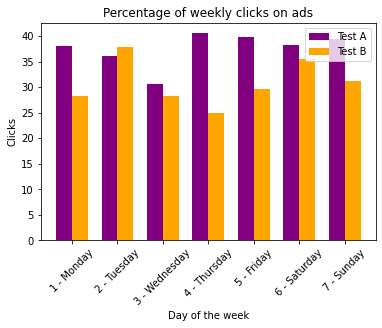

In [122]:
import matplotlib.pyplot as plt

index = np.arange(7)
bar_width = 0.35

plt.bar(index, df_a["percent_clicked"], bar_width, label="Test A", color ="Purple")
plt.bar(index + bar_width, df_b["percent_clicked"], bar_width, label="Test B", color ="Orange")
plt.xlabel("Day of the week")
plt.xticks(index + bar_width / 2, df_a["day"], rotation=45)
plt.ylabel("Clicks")
plt.title("Percentage of weekly clicks on ads")
plt.legend()

plt.show()

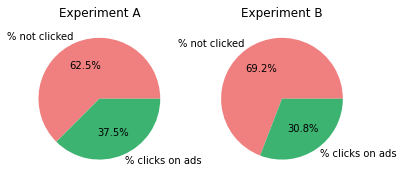

In [121]:
# Define the data
labels = ['% not clicked', '% clicks on ads', '% not clicked', '% clicks on ads']
sizes = [517, 310, 572, 255]
colors = ['lightcoral', 'mediumseagreen', 'lightcoral', 'mediumseagreen']

# Create the pie chart for group A
plt.subplot(1, 2, 1)
plt.pie(sizes[:2], labels=labels[:2], colors=colors[:2], autopct='%1.1f%%')
plt.title('Experiment A')

# Create the pie chart for group B
plt.subplot(1, 2, 2)
plt.pie(sizes[2:], labels=labels[2:], colors=colors[2:], autopct='%1.1f%%')
plt.title('Experiment B')

# Display the charts

plt.show()